<a href="https://colab.research.google.com/github/subin1005/project/blob/main/%EA%B3%A0%EA%B0%9D_%EB%8C%80%EC%B6%9C%EB%93%B1%EA%B8%89_%EB%B6%84%EB%A5%98_%ED%95%B4%EC%BB%A4%ED%86%A4(2024%EB%85%84_1%EC%9B%94).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고객 대출등급 분류 해커톤

### 1. 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import *
import random
import os
import torch

### 2. 데이터 불러오기

In [ ]:
# 구글 드라이브 연결하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/데이콘 고객 대출등급 분류(2024)/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이콘 고객 대출등급 분류(2024)/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/데이콘 고객 대출등급 분류(2024)/sample_submission.csv')

In [ ]:
train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [ ]:
test.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,TEST_00003,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,TEST_00004,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0


In [ ]:
# train 데이터 구조 파악
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [ ]:
# test 데이터 구조 파악
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64197 entries, 0 to 64196
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            64197 non-null  object 
 1   대출금액          64197 non-null  int64  
 2   대출기간          64197 non-null  object 
 3   근로기간          64197 non-null  object 
 4   주택소유상태        64197 non-null  object 
 5   연간소득          64197 non-null  int64  
 6   부채_대비_소득_비율   64197 non-null  float64
 7   총계좌수          64197 non-null  int64  
 8   대출목적          64197 non-null  object 
 9   최근_2년간_연체_횟수  64197 non-null  int64  
 10  총상환원금         64197 non-null  int64  
 11  총상환이자         64197 non-null  float64
 12  총연체금액         64197 non-null  float64
 13  연체계좌수         64197 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 6.9+ MB


train 데이터 구조
- 총 96294개의 데이터
- 15개의 변수. (수치형 변수 9개 + 범주형 변수 6개)

test 데이터 구조
- 총 64197개 데이터
- 14개의 변수 (TARGET 변수인 `대출등급` 변수 제외 train과 데이터 구조 같음)

`ID`는 인덱스 역할 변수로 확인.

In [ ]:
# train 데이터 결축치 확인
train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [ ]:
# test 데이터 결축치 확인
test.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
dtype: int64

train, test 데이터 모두 결측이 없음.

### 3. 데이터 탐색

#### 3-0. 수치형, 범수형 변수 구분



In [ ]:
num_columns = train.select_dtypes(include=np.number).columns.tolist()
cat_columns = train.select_dtypes(exclude=np.number).columns.tolist()

- ID 변수는 인덱스이기에 제거

In [ ]:
cat_columns.remove('ID')
cat_columns

['대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급']

In [ ]:
num_train = train[num_columns]
num_test = test[num_columns]
cat_train = train[cat_columns]
cat_test = test.drop(num_columns,axis=1) # cat_columns로 하면 '대출등급' 변수도 있으니까, num_columns 제거로 함.

#### 3-1. 수치형 변수에 대한 시각화

- 총 9개의 수치형 변수가 존재

In [ ]:
num_train.columns

Index(['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자',
       '총연체금액', '연체계좌수'],
      dtype='object')

- 한 번에 그래프 9개 그리기

In [ ]:
import seaborn as sns
sns.set_theme()

In [ ]:
# 그래프 한글 깨짐 해결코드
# 폰트 설치하기

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get update -qq
!apt-get install fonts-nanum* -qq
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})

Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


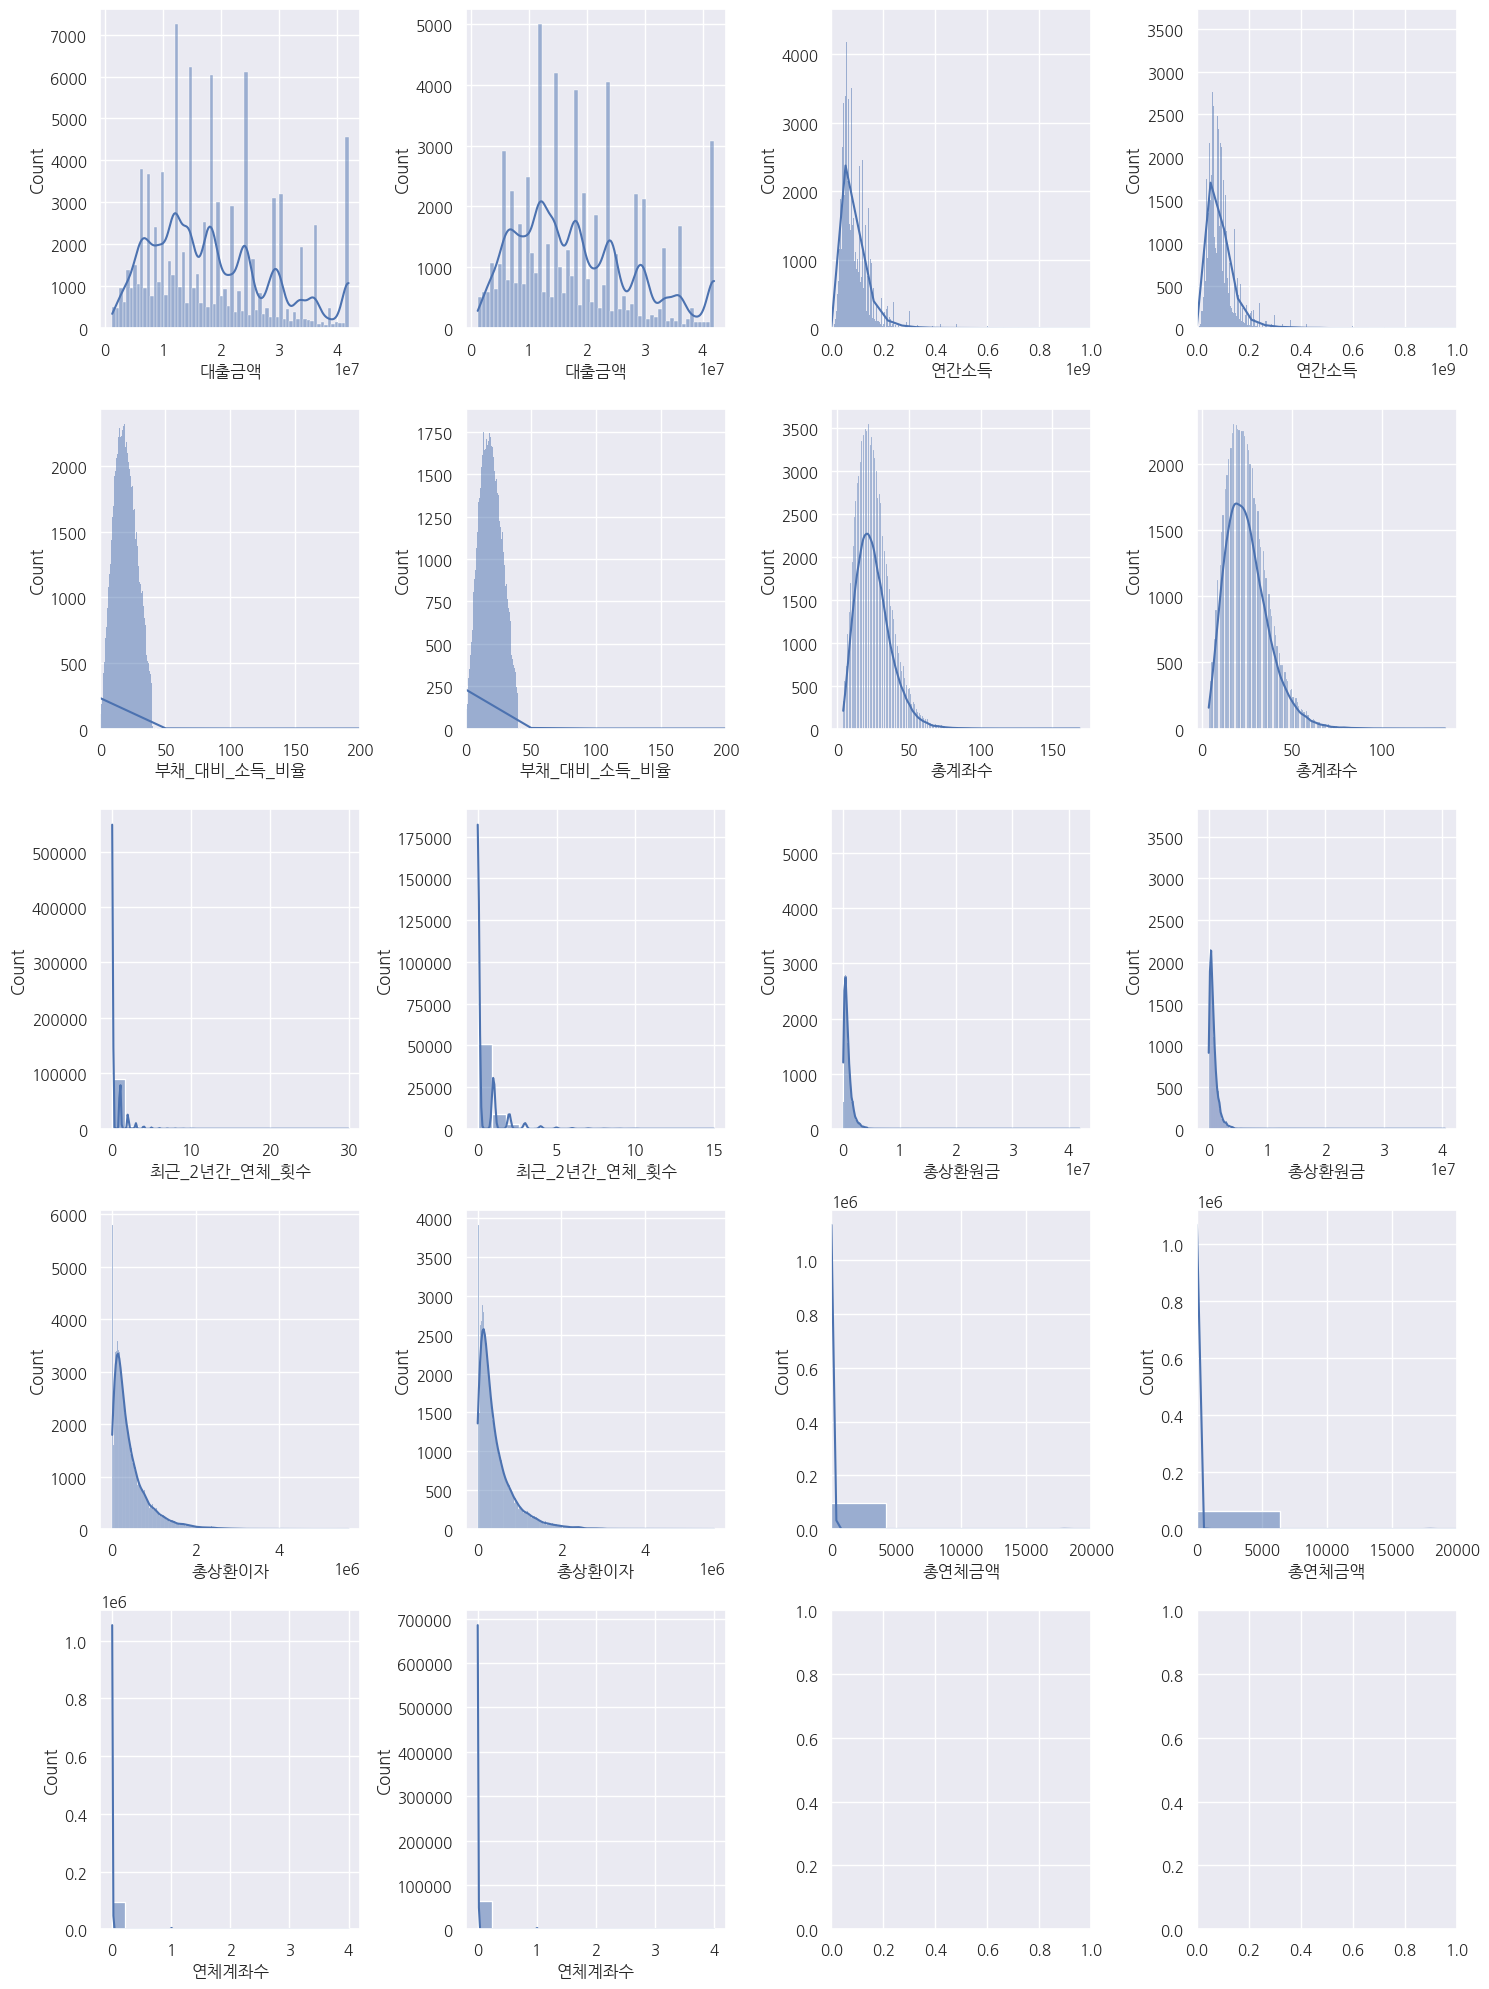

In [ ]:
fig, axs = plt.subplots(5, 4, figsize = (15, 20))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9,ax10, ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,ax19,ax20 = axs.flatten() #<- flatten 활용

ax1 = sns.histplot(num_train.iloc[:,0], kde=True, ax = ax1)
ax2 = sns.histplot(num_test.iloc[:,0], kde=True, ax = ax2)
ax3 = sns.histplot(num_train.iloc[:,1], kde=True, ax = ax3)
ax4 = sns.histplot(num_test.iloc[:,1], kde=True, ax = ax4)
ax5 = sns.histplot(num_train.iloc[:,2], kde=True, ax = ax5)
ax6 = sns.histplot(num_test.iloc[:,2], kde=True, ax = ax6)
ax7 = sns.histplot(num_train.iloc[:,3], kde=True, ax = ax7)
ax8 = sns.histplot(num_test.iloc[:,3], kde=True, ax = ax8)
ax9 = sns.histplot(num_train.iloc[:,4], kde=True, ax = ax9)
ax10 = sns.histplot(num_test.iloc[:,4], kde=True, ax = ax10)
ax11 = sns.histplot(num_train.iloc[:,5], kde=True, ax = ax11)
ax12 = sns.histplot(num_test.iloc[:,5], kde=True, ax = ax12)
ax13 = sns.histplot(num_train.iloc[:,6], kde=True, ax = ax13)
ax14 = sns.histplot(num_test.iloc[:,6], kde=True, ax = ax14)
ax15 = sns.histplot(num_train.iloc[:,7], kde=True, ax = ax15)
ax16 = sns.histplot(num_test.iloc[:,7], kde=True, ax = ax16)
ax17 = sns.histplot(num_train.iloc[:,8], kde=True, ax = ax17)
ax18 = sns.histplot(num_test.iloc[:,8], kde=True, ax = ax18)

# x축 범위지정
ax3.set_xlim([0,1000000000])
ax4.set_xlim([0,1000000000])
ax5.set_xlim([0,200])
ax6.set_xlim([0,200])
ax15.set_xlim([0,20000])
ax16.set_xlim([0,20000])

fig.tight_layout() # 그래프 사이 간격을 조정하여 보기 좋게 만듦
plt.show()


<Axes: >

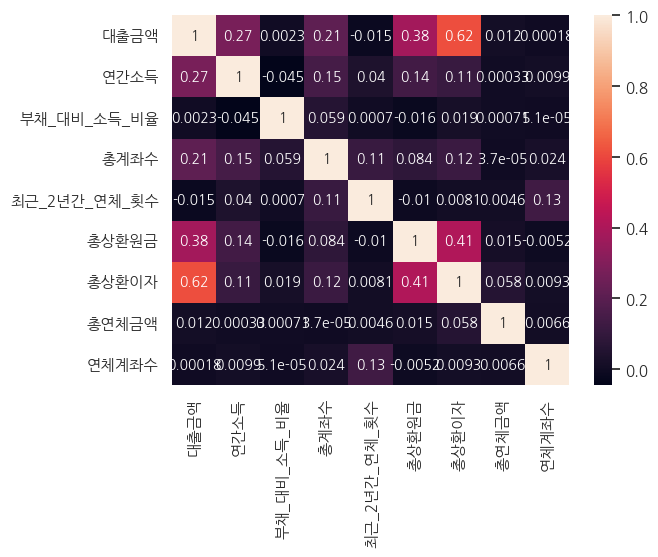

In [ ]:
# 모든 수치형 변수간의 상관관계를 히트맵으로 나타냄
sns.heatmap(num_train.corr(), annot=True)

In [ ]:
num_train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


> 위의 그래프와 기술통계량으로 알 수 있는 것

- 대출금액을 제외한 대부분의 변수가 왼쪽으로 치우친 분포를 가졌으며, 이상치가 많이 존재한다.
- 총연체금액, 연체계좌수는 75% 이상의 데이터가 0이다.
- 대출금액과 총상환이자의 상관관계가 높은 편이다.
- train과 test 데이터가 비슷한 경향을 가진 것이 확인됨
.

---



##### 대출등급과 수치형 변수

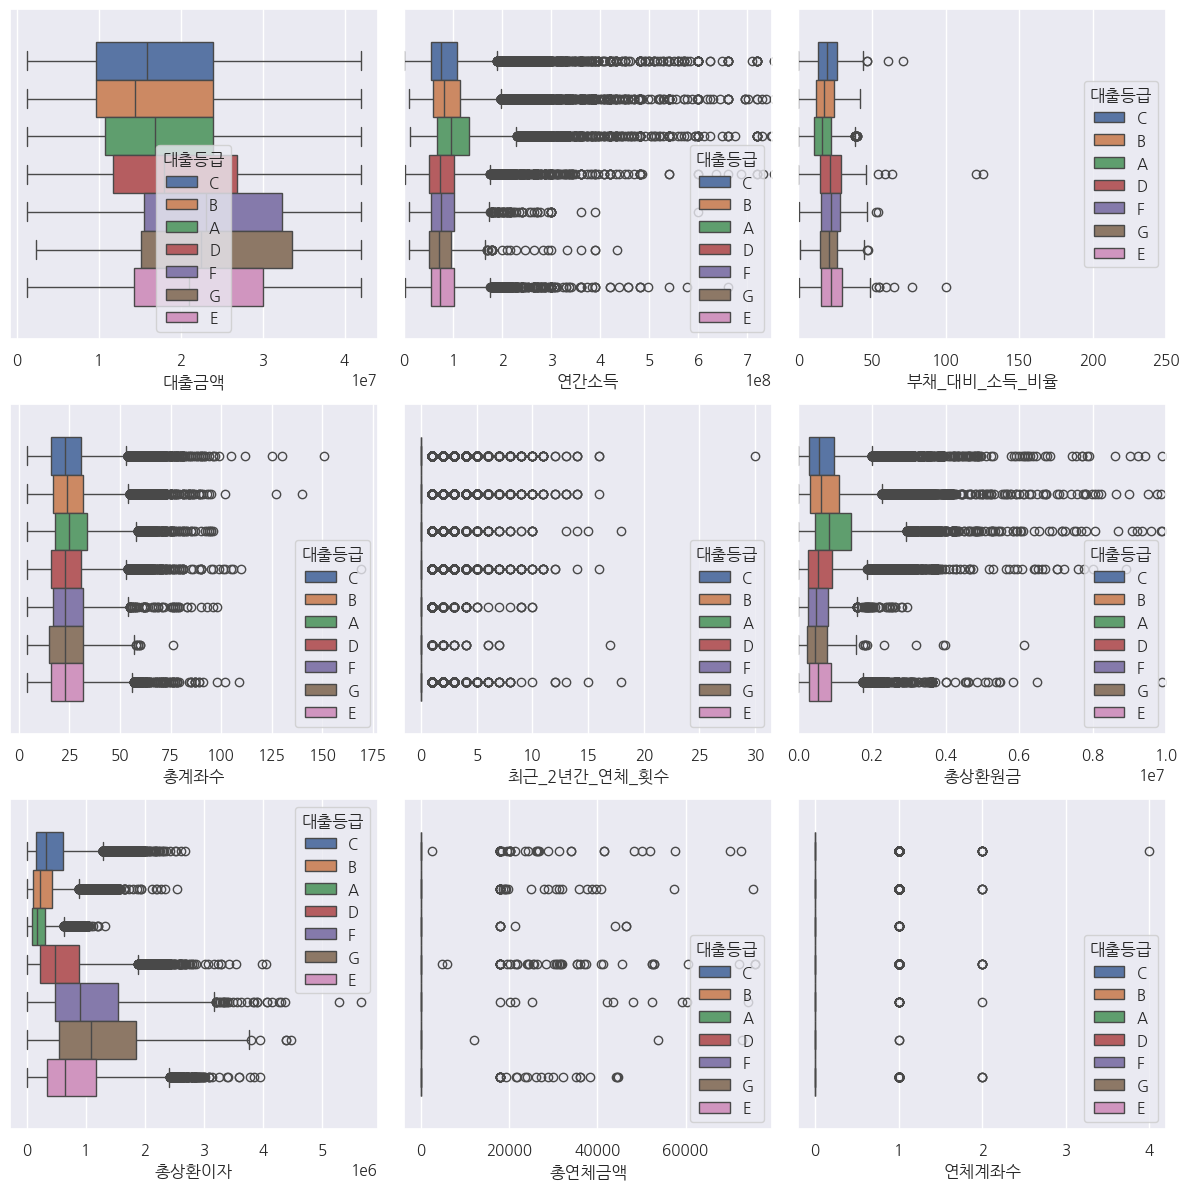

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9 = axs.flatten() #<- flatten 활용

ax1 = sns.boxplot(x = num_train.columns[0], data = train, hue = '대출등급', ax = ax1)
ax2 = sns.boxplot(x = num_train.columns[1], data = train, hue = '대출등급', ax = ax2)
ax3 = sns.boxplot(x = num_train.columns[2], data = train, hue = '대출등급', ax = ax3)
ax4 = sns.boxplot(x = num_train.columns[3], data = train, hue = '대출등급', ax = ax4)
ax5 = sns.boxplot(x = num_train.columns[4], data = train, hue = '대출등급', ax = ax5)
ax6 = sns.boxplot(x = num_train.columns[5], data = train, hue = '대출등급', ax = ax6)
ax7 = sns.boxplot(x = num_train.columns[6], data = train, hue = '대출등급', ax = ax7)
ax8 = sns.boxplot(x = num_train.columns[7], data = train, hue = '대출등급', ax = ax8)
ax9 = sns.boxplot(x = num_train.columns[8], data = train, hue = '대출등급', ax = ax9)

ax2.set_xlim([0,750000000])
ax3.set_xlim([0,250])
ax6.set_xlim([0,10000000])

fig.tight_layout() # 그래프 사이 간격을 조정하여 보기 좋게 만듦
plt.show()

> 대출등급에 따라 대출금액, 총상환이자이 눈에 띄게 달라 보. 특히 총상환이자가 대출등급과 상관관계가 있어보임.

#### 3-2 범주형 변수에 대한 시각화

- 총 5개의 범주형 변수가 존재

In [ ]:
cat_train.columns

Index(['대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급'], dtype='object')

In [ ]:
# 그래프 한글 깨짐 해결코드
# 폰트 설치하기
# [출처] Python | 코랩 matplotlib 한글 깨짐 해결방법|작성자 빅솔

%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리

!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
# mpl.rcParams['axes.unicode_minus'] = False # 음수 깨질때 뒤에 적어두기.

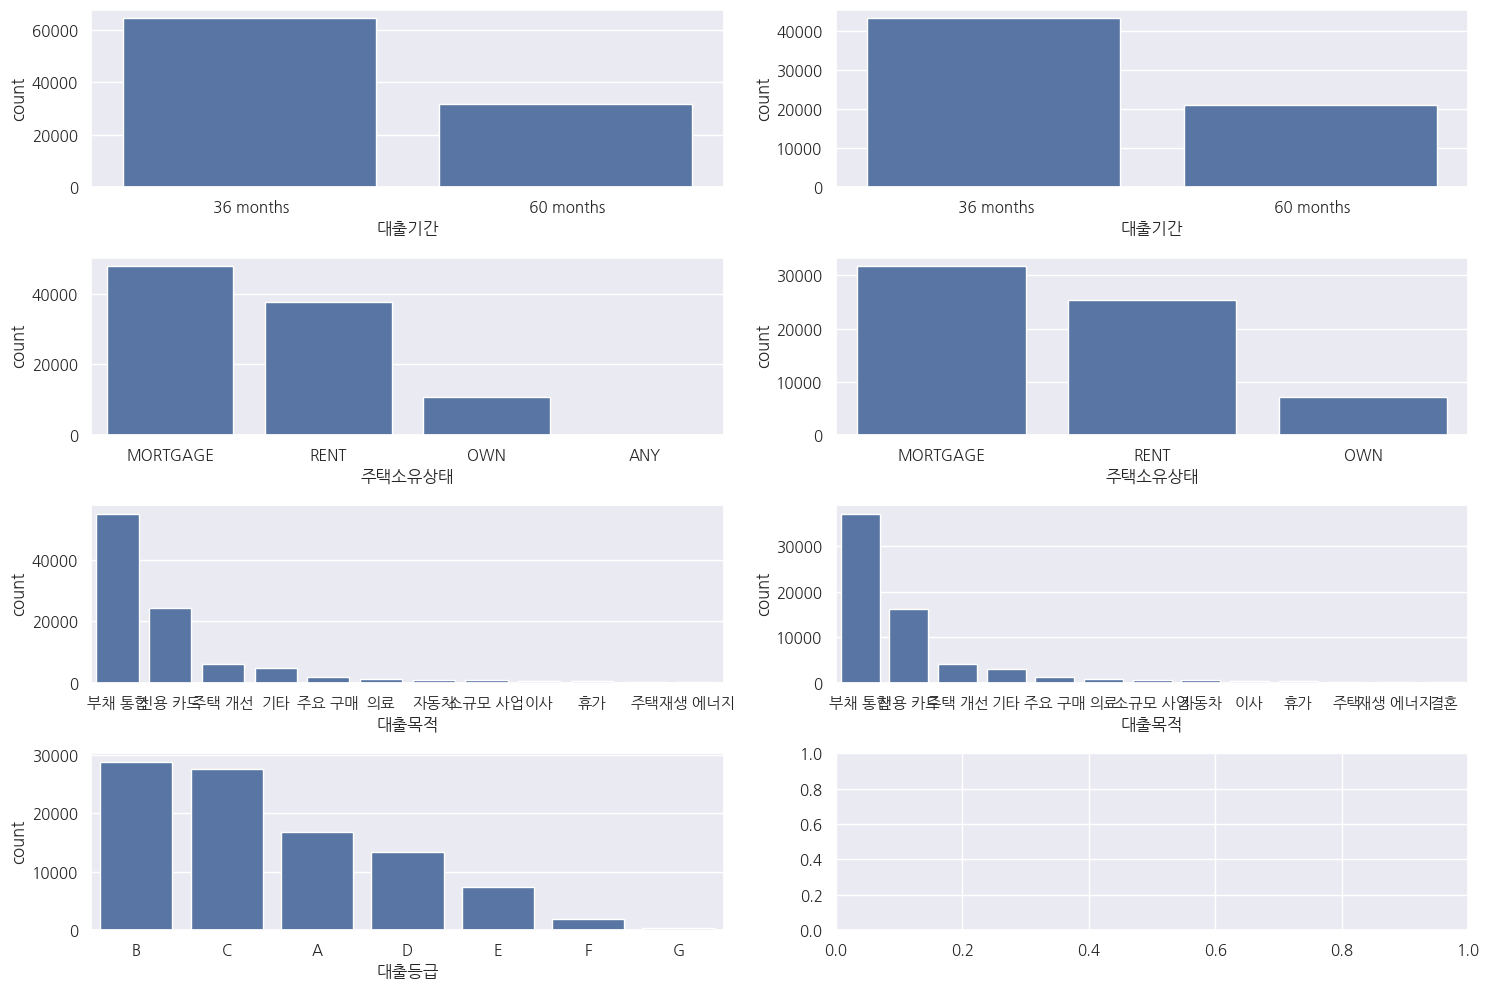

In [ ]:
fig, axs = plt.subplots(4, 2, figsize = (15, 10))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axs.flatten()

ax1 = sns.countplot(x = cat_train.columns[0], data = cat_train,  order = cat_train[cat_train.columns[0]].value_counts().index, ax = ax1)
ax2 = sns.countplot(x = cat_train.columns[0], data = cat_test, order = cat_test[cat_train.columns[0]].value_counts().index, ax = ax2)

ax3 = sns.countplot(x = cat_train.columns[2], data = cat_train, order = cat_train[cat_train.columns[2]].value_counts().index, ax = ax3)
ax4 = sns.countplot(x = cat_train.columns[2], data = cat_test, order = cat_test[cat_train.columns[2]].value_counts().index,ax = ax4)

ax5 = sns.countplot(x = cat_train.columns[3], data = cat_train, order = cat_train[cat_train.columns[3]].value_counts().index, ax = ax5)
ax6 = sns.countplot(x = cat_train.columns[3], data = cat_test, order = cat_test[cat_train.columns[3]].value_counts().index,ax = ax6)

ax7 = sns.countplot(x = cat_train.columns[4], data = cat_train, order = cat_train[cat_train.columns[4]].value_counts().index,ax = ax7)


fig.tight_layout() # 그래프 사이 간격을 조정하여 보기 좋게 만듦
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

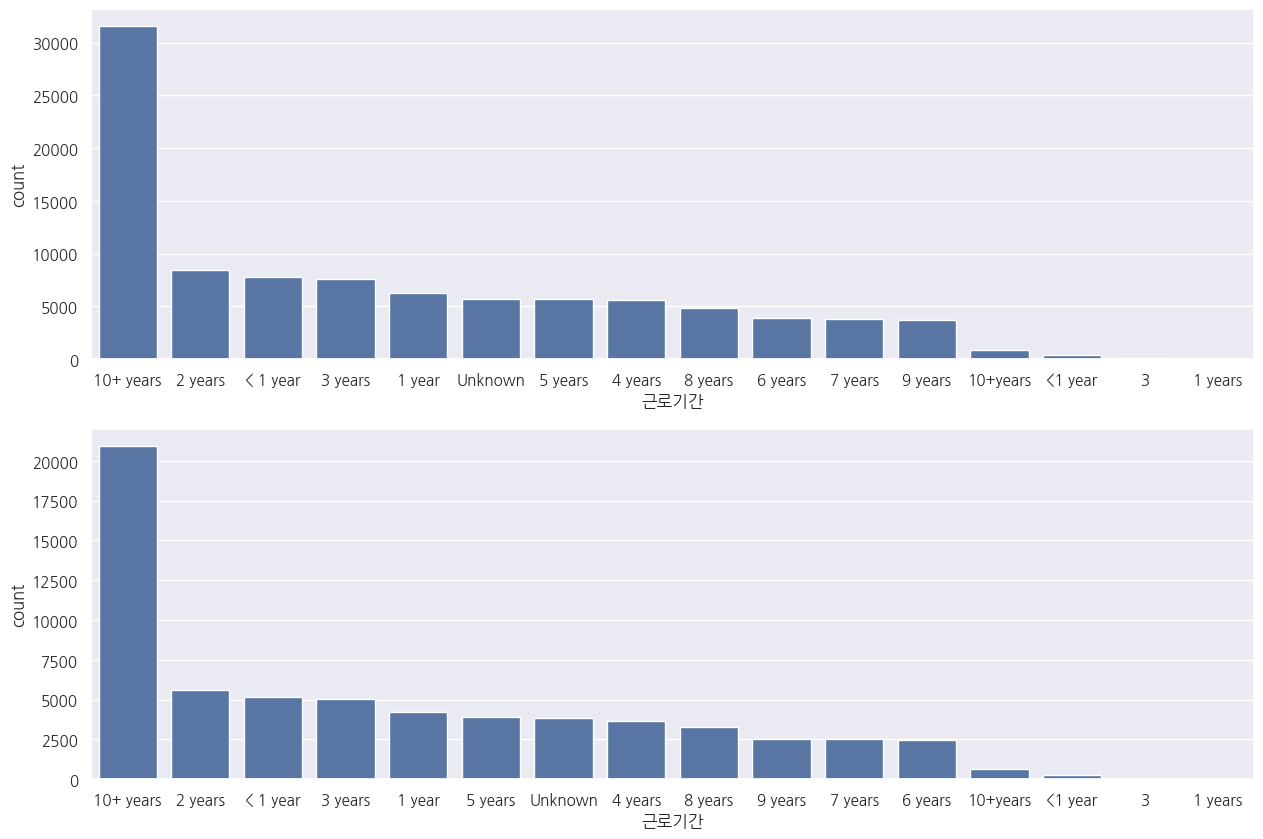

In [ ]:
fig, axs = plt.subplots(2,1, figsize = (15, 10))
ax1, ax2 = axs.flatten()

ax1 = sns.countplot(x = '근로기간', data = cat_train, order = cat_train['근로기간'].value_counts().index, ax = ax1)
ax2 = sns.countplot(x = '근로기간', data = cat_test,  order = cat_test['근로기간'].value_counts().index, ax = ax2)

plt.show

> 그래프를 통해 알 수 있는 점
- 근로기간은 10+ years가 가장 많고 나머지 범주는 크게 차이가 없음. (범주 표현 통일이 필요해 보임)
- 대출목적은 부채통합, 신용카드가 대부분을 차지하고, 주택개선, 기타 순으로 많은 비율을 가짐.
- 대출등급은 B,C가 비슷하게 많고, 그 뒤로 A,D,E,F,G 순으로 많음.
- 대출기간은 36months가 60months에 비해 2배 가량 많은 것으로 보임
- 주택소유상태는 MORTGAGE, RENT, OWN 순으로 많고, ANY는 하나 있음 (이상치로 보임)
- train, test의 범주형 변수는 비슷한 경향을 가지고 있음.

##### 대출등급과 범주형 변수

- 대출등급과 주택소유상태

<function matplotlib.pyplot.show(close=None, block=None)>

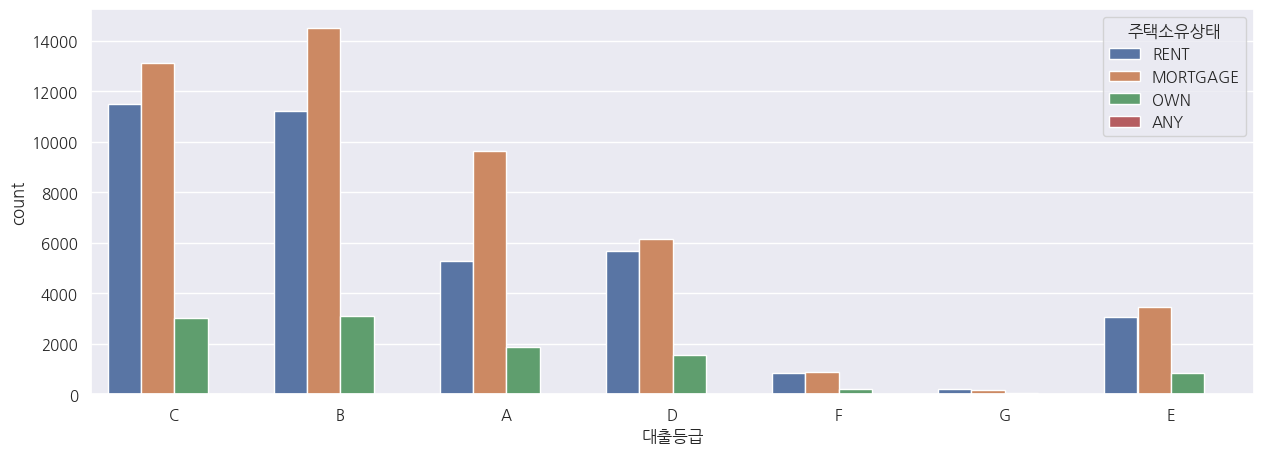

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize = (15, 5))
ax1 = sns.countplot(x = '대출등급', data = cat_train,hue = '주택소유상태', ax = ax1)
plt.show

- 대출등급과 대출기간

<function matplotlib.pyplot.show(close=None, block=None)>

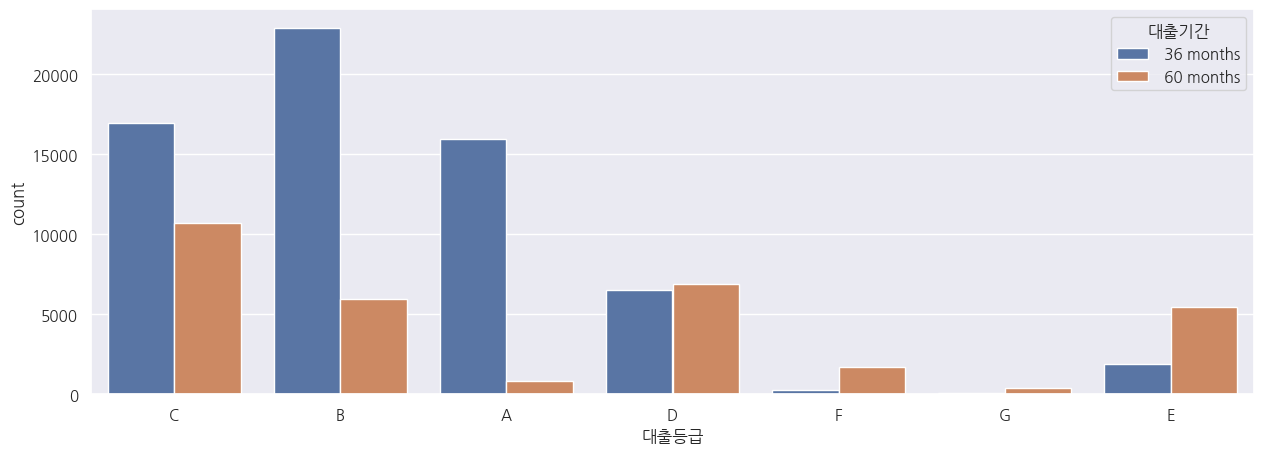

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize = (15, 5))
ax1 = sns.countplot(x = '대출등급', data = cat_train,hue = '대출기간', ax = ax1)
plt.show

- 대출등급과 근로기간

<function matplotlib.pyplot.show(close=None, block=None)>

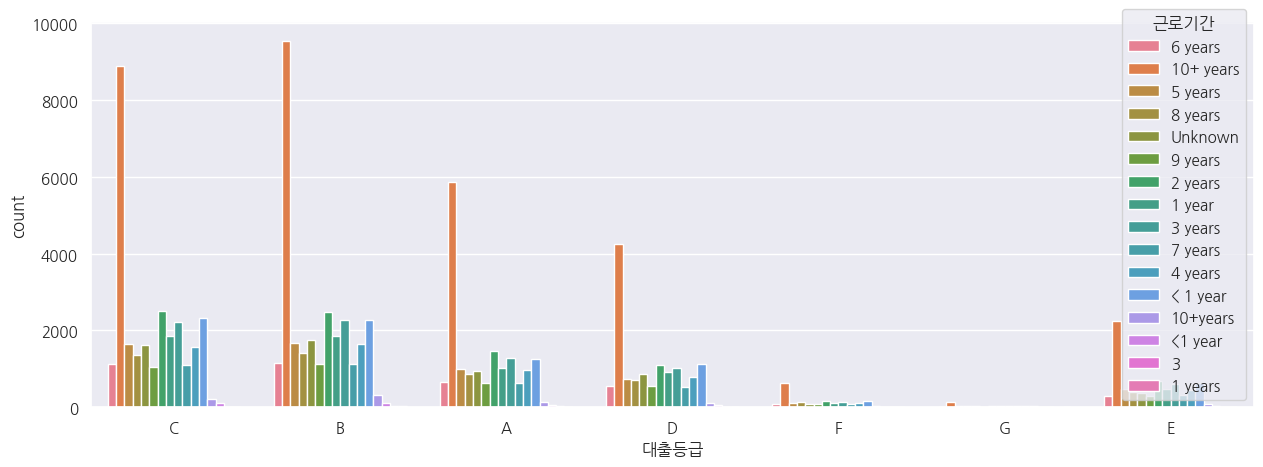

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize = (15, 5))
ax1 = sns.countplot(x = '대출등급', data = cat_train,hue = '근로기간', ax = ax1)
plt.show

- 대출등급과 대출목적

<function matplotlib.pyplot.show(close=None, block=None)>

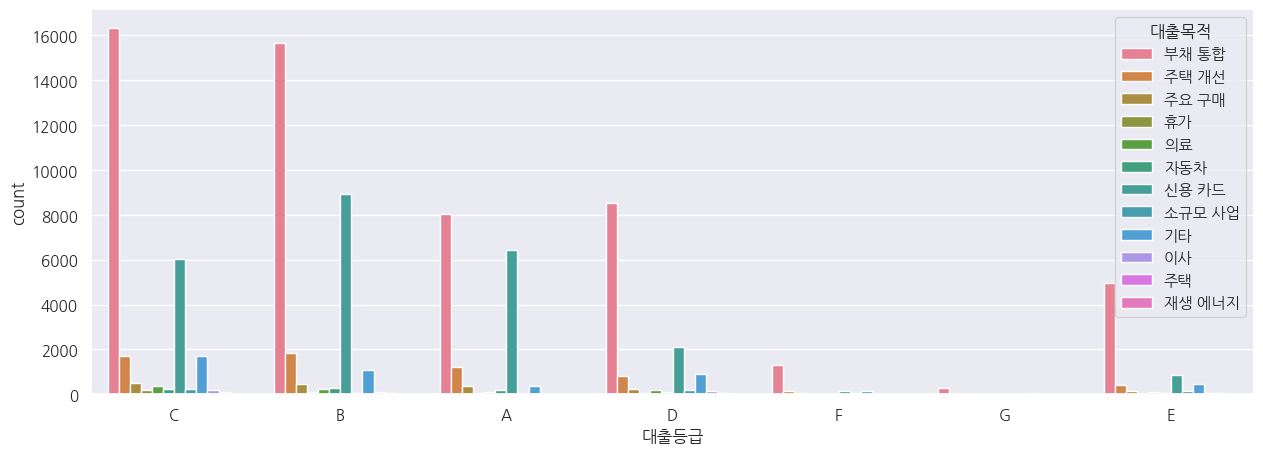

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize = (15, 5))
ax1 = sns.countplot(x = '대출등급', data = cat_train,hue = '대출목적', ax = ax1)
plt.show

대출기간을 제외한 범주형 변수는 범주별로 대출등급의 경향이 크게 다르지 않지만, 대출기간은 36 months인지 60 months인지에 따라 대출기간의 경향이 눈에 띄게 다르게 나타난다.

- 대출기간이 36 months 일 때, 대출등급은 B, C, A 순으로 빈도가 높고 대부분을 차지한다.
- 대출기간이 60 months 인 경우는 대출등급이 C,D,B,E 순으로 빈도가 높게 나타난다.


### 4. 데이터 전처리

아래의 전처리 외에 이상치 제거, 연간소득의 구간화, 오버샘플링, 정규화/표준화/로그변환 등 다양한 전처리를 시도해봤으나 점수에 좋은 영향을 미치지 않았음.

###### 시드고정

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(41)

##### 1) 변수 `근로기간` 범주 표현 통일

In [ ]:
train.loc[train['근로기간'] == '1 years', '근로기간'] = '1 year'
train.loc[train['근로기간'] == '10+years', '근로기간'] = '10+ years'
train.loc[train['근로기간'] == '3', '근로기간'] = '3 years'
train.loc[train['근로기간'] == '< 1 year', '근로기간'] = '<1 year'

In [ ]:
test.loc[test['근로기간'] == '1 years', '근로기간'] = '1 year'
test.loc[test['근로기간'] == '10+years', '근로기간'] = '10+ years'
test.loc[test['근로기간'] == '3', '근로기간'] = '3 years'
test.loc[test['근로기간'] == '< 1 year', '근로기간'] = '<1 year'

##### 2) 필요하지 않은 변수 `ID` 제거

In [ ]:
train.drop(['ID'], axis = 1, inplace = True)
test.drop(['ID'], axis = 1, inplace = True)

##### 3) 대출목적이 'ANY'인 데이터 삭제 (1개)

In [ ]:
train = train[train['대출목적']!='ANY']

##### 4) 파생변수 생성

- 근로기간/대출기간
- 연간소득/대출금액
- 한달 대출금액

등의 다양한 파생변수를 만들어본 결과, 결과가 좋았던 두 파생변수만 생성

###### - 대출금액_대비_총상환원금_비율

In [ ]:
train['대출금액_대비_총상환원금_비율'] = train['총상환원금'] / train['대출금액']
test['대출금액_대비_총상환원금_비율'] = test['총상환원금'] / test['대출금액']

###### - 대출금액_대비_총상환이자_비율

In [ ]:
train['대출금액_대비_총상환이자_비율'] = train['총상환이자'] / train['대출금액']
test['대출금액_대비_총상환이자_비율'] = test['총상환이자'] / test['대출금액']

##### 5) 데이터 분할

In [ ]:
X = train.drop(['대출등급'], axis = 1)
y = train['대출등급']

In [ ]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state = 41)

##### 6) 인코딩

###### 대출기간, 근로기간 (순서형범주)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# 변수의 범주 순서를 정의
loan_order = [' 36 months', ' 60 months']
work_order = ['Unknown', '<1 year', '1 year',  '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years',  '10+ years']

# OrdinalEncoder 객체 생성
ordinal_encoder = OrdinalEncoder(categories=[loan_order, work_order])

# 데이터 프레임에 대해 Ordinal Encoding 수행
ordinal_encoder.fit(train_X[['대출기간', '근로기간']])

OrdinalEncoder(categories=[[' 36 months', ' 60 months'],
                           ['Unknown', '<1 year', '1 year', '2 years',
                            '3 years', '4 years', '5 years', '6 years',
                            '7 years', '8 years', '9 years', '10+ years']])

In [ ]:
train_X[['대출기간', '근로기간']] = ordinal_encoder.transform(train_X[['대출기간', '근로기간']])
valid_X[['대출기간', '근로기간']] = ordinal_encoder.transform(valid_X[['대출기간', '근로기간']])
test[['대출기간', '근로기간']] = ordinal_encoder.transform(test[['대출기간', '근로기간']])

In [ ]:
train_X[['대출기간', '근로기간']] = train_X[['대출기간', '근로기간']].astype(object)
valid_X[['대출기간', '근로기간']] = valid_X[['대출기간', '근로기간']].astype(object)
test[['대출기간', '근로기간']] = test[['대출기간', '근로기간']].astype(object)

######그 외 범주형 변수

In [ ]:
pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 786.0 kB/s eta 0:00:00


In [ ]:
# 명목형 변수에 하는 인코딩 (효율이 더 좋아서 이걸로.)
import category_encoders as ce

# BinaryEncoder 객체 생성
binary_encoder = ce.BinaryEncoder(cols=['주택소유상태', '대출목적'])

# 데이터 프레임에 대해 Binary Encoding 수행
binary_encoder.fit(train_X)

BinaryEncoder(cols=['주택소유상태', '대출목적'],
              mapping=[{'col': '주택소유상태',
                        'mapping':     주택소유상태_0  주택소유상태_1  주택소유상태_2
 1         0         0         1
 2         0         1         0
 3         0         1         1
 4         1         0         0
-1         0         0         0
-2         0         0         0},
                       {'col': '대출목적',
                        'mapping':      대출목적_0  대출목적_1  대출목적_2  대출목적_3
 1        0       0       0       1
 2        0       0       1       0
 3        0       0       1       1
 4        0       1       0       0
 5        0       1       0       1
 6        0       1       1       0
 7        0       1       1       1
 8        1       0       0       0
 9        1       0       0       1
 10       1       0       1       0
 11       1       0       1       1
 12       1       1       0       0
-1        0       0       0       0
-2        0       0       0       0}])

In [ ]:
# 데이터 프레임에 대해 Binary Encoding 수행
train_X = binary_encoder.transform(train_X)
valid_X = binary_encoder.transform(valid_X)
test = binary_encoder.transform(test)

### 5. 모델링

##### 타입변경

In [ ]:
train_X['주택소유상태_0'] =train_X['주택소유상태_0'].astype(object)
valid_X['주택소유상태_0'] =valid_X['주택소유상태_0'].astype(object)
test['주택소유상태_0'] =test['주택소유상태_0'].astype(object)

train_X['주택소유상태_1'] =train_X['주택소유상태_1'].astype(object)
valid_X['주택소유상태_1'] =valid_X['주택소유상태_1'].astype(object)
test['주택소유상태_1'] =test['주택소유상태_1'].astype(object)

train_X['주택소유상태_2'] =train_X['주택소유상태_2'].astype(object)
valid_X['주택소유상태_2'] =valid_X['주택소유상태_2'].astype(object)
test['주택소유상태_2'] =test['주택소유상태_2'].astype(object)

train_X['대출목적_0'] =train_X['대출목적_0'].astype(object)
valid_X['대출목적_0'] =valid_X['대출목적_0'].astype(object)
test['대출목적_0'] =test['대출목적_0'].astype(object)

train_X['대출목적_1'] =train_X['대출목적_1'].astype(object)
valid_X['대출목적_1'] =valid_X['대출목적_1'].astype(object)
test['대출목적_1'] =test['대출목적_1'].astype(object)

train_X['대출목적_2'] =train_X['대출목적_2'].astype(object)
valid_X['대출목적_2'] =valid_X['대출목적_2'].astype(object)
test['대출목적_2'] =test['대출목적_2'].astype(object)

train_X['대출목적_3'] =train_X['대출목적_3'].astype(object)
valid_X['대출목적_3'] =valid_X['대출목적_3'].astype(object)
test['대출목적_3'] =test['대출목적_3'].astype(object)

In [ ]:
train_X.drop(['총상환원금', '총상환이자'], axis = 1, inplace = True)
valid_X.drop(['총상환원금', '총상환이자'], axis = 1, inplace = True)
test.drop(['총상환원금', '총상환이자'], axis = 1, inplace = True)

##### 0) 랜덤포레스트 이용하여 변수중요도 알아보기

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state =0)
rf.fit(train_X, train_y)

In [ ]:
df = pd.concat([pd.DataFrame(train_X.columns), pd.DataFrame(rf.feature_importances_)], axis = 1)
df.columns = ['column','important']
df.sort_values('important', ascending = False)

,column,important
16,대출금액_대비_총상환원금_비율,0.449889
17,대출금액_대비_총상환이자_비율,0.294628
7,부채_대비_소득_비율,0.046653
6,연간소득,0.043409
0,대출금액,0.040299
8,총계좌수,0.035905
1,대출기간,0.030150
2,근로기간,0.022564
13,최근_2년간_연체_횟수,0.009215
12,대출목적_3,0.006176


-> 파생변수로 생성한, 두 변수가 70% 이상의 중요도를 차지하는 핵심 변수임을 알 수 있음. 또한 EDA 과정에서 대출기간이 대출등급에 영향을 줄 것으로 예상했기에, **대출금액_대비_총상환원금_비율, 대출금액_대비_총상환이자_비율, 대출기간** 변수를 이용하여 모델링 진행.

In [ ]:
train_TOP3 = train_X[['대출금액_대비_총상환원금_비율', '대출금액_대비_총상환이자_비율', '대출기간']]
valid_TOP3 = valid_X[train_TOP3.columns]

##### 1) RandomForest

###### 최적의 하이퍼파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0)

param = {
    'max_depth':range(10, 15),
    'n_estimators':range(100, 150, 5),
}
n_iter = 80

rs = RandomizedSearchCV(rf,
                        param_distributions=param,
                        n_iter=n_iter,
                        cv=10,
                        n_jobs=-1,
                        random_state = 0)
rs.fit(train_TOP3, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 50 is smaller than n_iter=80. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_iter=80, n_jobs=-1,
                   param_distributions={'max_depth': range(10, 15),
                                        'n_estimators': range(100, 150, 5)},
                   random_state=0)

In [ ]:
# 0
pd.DataFrame(rs.cv_results_).sort_values('rank_test_score')[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
46,13.445163,0.918398,0.230389,0.056467,130,14,"{'n_estimators': 130, 'max_depth': 14}",0.951814,0.951952,0.949875,0.953752,0.952922,0.953475,0.957214,0.948075,0.953199,0.954722,0.952700,0.002391,1
44,13.405367,2.040710,0.231137,0.075249,120,14,"{'n_estimators': 120, 'max_depth': 14}",0.951537,0.951952,0.949737,0.953891,0.952645,0.953475,0.957353,0.948075,0.953337,0.954999,0.952700,0.002479,1
43,14.386375,4.008791,0.255351,0.122417,115,14,"{'n_estimators': 115, 'max_depth': 14}",0.951675,0.951952,0.949737,0.953752,0.952645,0.953475,0.957214,0.948214,0.953199,0.954999,0.952686,0.002411,3
40,10.869535,1.690378,0.200555,0.060846,100,14,"{'n_estimators': 100, 'max_depth': 14}",0.951814,0.951675,0.949598,0.953614,0.952922,0.953337,0.957076,0.948352,0.953337,0.954999,0.952672,0.002376,4
23,12.256266,1.805403,0.214148,0.069204,115,12,"{'n_estimators': 115, 'max_depth': 12}",0.952229,0.952229,0.949322,0.952922,0.952783,0.954029,0.957906,0.948491,0.952368,0.954445,0.952672,0.002483,4


In [ ]:
# 14,130
# 14,120
# 14,115
# 14,100
# 12,115

from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(max_depth = 14, n_estimators = 130, random_state = 0)
rf1.fit(train_TOP3, train_y)
rf2 = RandomForestClassifier(max_depth = 14, n_estimators = 120,  random_state = 0)
rf2.fit(train_TOP3, train_y)
rf3 = RandomForestClassifier(max_depth = 14, n_estimators = 115, random_state = 0)
rf3.fit(train_TOP3, train_y)
rf4 = RandomForestClassifier(max_depth = 14, n_estimators = 100, random_state = 0)
rf4.fit(train_TOP3, train_y)
rf5 = RandomForestClassifier(max_depth = 12, n_estimators = 115, random_state = 0)
rf5.fit(train_TOP3, train_y)

RandomForestClassifier(max_depth=12, n_estimators=115, random_state=0)

In [ ]:
pred1 = rf1.predict(valid_TOP3)
pred2 = rf2.predict(valid_TOP3)
pred3 = rf3.predict(valid_TOP3)
pred4 = rf4.predict(valid_TOP3)
pred5 = rf5.predict(valid_TOP3)

In [ ]:
from sklearn.metrics import f1_score

f1_1 = f1_score(valid_y, pred1, average='macro')
f1_2 = f1_score(valid_y, pred2, average='macro')
f1_3 = f1_score(valid_y, pred3, average='macro')
f1_4 = f1_score(valid_y, pred4, average='macro')
f1_5 = f1_score(valid_y, pred5, average='macro')
print(f1_1, f1_2, f1_3, f1_4, f1_5)

0.94602255300229 0.9469540363350083 0.9472696346011806 0.9468024550677405 0.9456298033451735


max_depth = 14, n_estimators = 115일 때, macro_f1 점수가 가장 높게 나타남.

##### 2) GradientBoostClassifier(GBC)

###### 최적찾기

GradientBoosting 모델은 학습시간이 오래 걸려, GridSearchCV를 사용하지 않고, 직접 파라미터를 조정하며 점수를 확인했음.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
# 10 : 0.9473
# 15 : 0.948587
# 18 : 0.948615
# 19 : 0.9483
# 20 : 0.94841
# 19, 150 : 94.99
# 18, 150 : 0.9504 (private : 0.9470266)
# 18, 200 : 0.9497

gbc = GradientBoostingClassifier(n_estimators = 150, max_depth = 18, learning_rate =0.1, random_state=0).fit(train_TOP3, train_y)
pred = gbc.predict(valid_TOP3)
f1 = f1_score(valid_y, pred, average='macro')
f1

0.9497656290444624

여러 조합을 시도해봤을 때, n_estimators = 150, max_depth = 18, learning_rate = 0.1 일 때 가장 좋은 점수를 얻었다.

##### 3) DT

###### 최적찾기시도

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 0)

param = {
    'criterion': ['log_loss','gini','entropy'],
    'min_samples_split'  : range(2,7),
    'max_depth':range(10, 17)
}
n_iter = 80

rs = RandomizedSearchCV(dt,
                        param_distributions=param,
                        n_iter=n_iter,
                        cv=5,
                        n_jobs=-1,
                        random_state = 0)
rs.fit(train_TOP3, train_y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=80, n_jobs=-1,
                   param_distributions={'criterion': ['log_loss', 'gini',
                                                      'entropy'],
                                        'max_depth': range(10, 17),
                                        'min_samples_split': range(2, 7)},
                   random_state=0)

In [ ]:
# entropy, 4, 12
# log_loss, 3, 12
# log_loss, 2, 12
# entropy, 2,12
# log_loss, 5,12
pd.DataFrame(rs.cv_results_).sort_values('rank_test_score')[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,0.459745,0.166410,0.043750,0.013090,4,12,entropy,"{'min_samples_split': 4, 'max_depth': 12, 'cri...",0.949114,0.950845,0.951883,0.951537,0.952575,0.951191,0.001179,1
59,0.339315,0.016132,0.037072,0.001872,3,12,log_loss,"{'min_samples_split': 3, 'max_depth': 12, 'cri...",0.949322,0.950706,0.951745,0.951468,0.952368,0.951122,0.001046,2
63,0.591177,0.085981,0.066045,0.017082,2,12,log_loss,"{'min_samples_split': 2, 'max_depth': 12, 'cri...",0.949114,0.950983,0.951814,0.951122,0.952575,0.951122,0.001153,2
67,0.367232,0.090104,0.042607,0.011376,2,12,entropy,"{'min_samples_split': 2, 'max_depth': 12, 'cri...",0.949114,0.950983,0.951814,0.951122,0.952575,0.951122,0.001153,2
13,0.332502,0.009881,0.036983,0.002365,5,12,log_loss,"{'min_samples_split': 5, 'max_depth': 12, 'cri...",0.949460,0.950568,0.951606,0.951329,0.952575,0.951108,0.001045,5


- 위 결과 나온 상위 5개의 파라미터를 모델학습에 적용

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 4, max_depth = 12, random_state = 0).fit(train_TOP3, train_y)
dt2 = DecisionTreeClassifier(criterion = 'log_loss', min_samples_split = 3, max_depth = 12, random_state = 0).fit(train_TOP3, train_y)
dt3 = DecisionTreeClassifier(criterion = 'log_loss', min_samples_split = 2, max_depth = 12, random_state = 0).fit(train_TOP3, train_y)
dt4 = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, max_depth = 12, random_state = 0).fit(train_TOP3, train_y)
dt5 = DecisionTreeClassifier(criterion = 'log_loss', min_samples_split = 5, max_depth = 12, random_state = 0).fit(train_TOP3, train_y)
pred1 = dt1.predict(valid_TOP3)
pred2 = dt2.predict(valid_TOP3)
pred3 = dt3.predict(valid_TOP3)
pred4 = dt4.predict(valid_TOP3)
pred5 = dt5.predict(valid_TOP3)

In [ ]:
from sklearn.metrics import f1_score

f1_1 = f1_score(valid_y, pred1, average='macro')
f1_2 = f1_score(valid_y, pred2, average='macro')
f1_3 = f1_score(valid_y, pred3, average='macro')
f1_4 = f1_score(valid_y, pred4, average='macro')
f1_5 = f1_score(valid_y, pred5, average='macro')

In [ ]:
print(f1_1, f1_2, f1_3, f1_4, f1_5)

0.9433386588081504 0.9425495339043686 0.9430491233792682 0.9430491233792682 0.9432659754411601


criterion = 'entropy', in_samples_split = 4 ,max_depth = 12 일 때, 가장 좋은 점수를 얻음

##### 앙상블모델

> RandomForest, GradientBoosting, DecisionTree 세 모델을 이용해 앙상블 모델을 생성

In [ ]:
# 세가지 모델 앙상블, 시드 고정
# rf : 14,115 (0.9472696)
# gbc : 18, 0.1, 150 (0.9497656)
# dt : entropy, 4, 12 (0.943339)

from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators = 115, max_depth = 14, random_state=0)
clf2 = GradientBoostingClassifier(n_estimators = 150, max_depth = 18, learning_rate = 0.1, random_state=0)
clf3 =  DecisionTreeClassifier(max_depth = 12, min_samples_split = 4, criterion='entropy', random_state=0)

ensemble3 = VotingClassifier(estimators = [('rf', clf1),  ('gbc', clf2), ('dt', clf3)], voting = 'soft', weights = [4,5,1])
ensemble3.fit(train_TOP3, train_y)
pred = ensemble3.predict(valid_TOP3)

In [ ]:
# 가중치 없음, hard : 0.9484 (soft :0.9467)
# [3,5,1], hard : 0.9504 (soft : 0.9501 -> private : 0.947608)
# [4,5,1], hard : 0.9494 -> 0.9466 (soft : 0.9503-> 0.947629)
# [4,5,2], hard : 0.9488 (soft : 0.9503)
from sklearn.metrics import f1_score
f1 = f1_score(valid_y, pred, average='macro')
f1

0.9503243222178716

- 여러 가중치 시도해본 결과, rf, gbc, dt 모델에 각각 [4,5,1]의 가중치를 두고 soft 방식으로 모델링한 결과가 가장 좋아서 최종 모델로 결정

In [ ]:
pred = ensemble3.predict(test[train_TOP3.columns])

### 6. 파일 제출

In [ ]:
submission

,ID,대출등급
0,TEST_00000,G
1,TEST_00001,G
2,TEST_00002,G
3,TEST_00003,G
4,TEST_00004,G
...,...,...
64192,TEST_64192,G
64193,TEST_64193,G
64194,TEST_64194,G
64195,TEST_64195,G


In [ ]:
submission['대출등급'] = pred

In [ ]:
submission.to_csv('/content/drive/MyDrive/데이콘 고객 대출등급 분류(2024)/ensemble_soft451.csv', index=False)

In [ ]:
submission

,ID,대출등급
0,TEST_00000,B
1,TEST_00001,B
2,TEST_00002,A
3,TEST_00003,C
4,TEST_00004,C
...,...,...
64192,TEST_64192,D
64193,TEST_64193,D
64194,TEST_64194,D
64195,TEST_64195,C
